In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [71]:
df = pd.concat([df,dummy],axis =1)

In [72]:
df.head()

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class,Female,Male
0,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0,1,0
1,62,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0,0,1
2,62,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0,0,1
3,58,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0,0,1
4,72,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0,0,1


In [74]:
del df['gender']

In [77]:
df.head()

,age,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class,Female,Male
0,65,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0,1,0
1,62,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0,0,1
2,62,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0,0,1
3,58,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0,0,1
4,72,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0,0,1


In [78]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()

In [83]:
scaler.fit(df.drop('class',axis = 1))

E:\anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [85]:
scaled_features = scaler.transform(df.drop('class',axis=1))

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [90]:
df2  = df.to_csv('Knearrest.csv',index=False)

In [92]:
df1 = pd.read_csv('Knearrest.csv')

In [93]:
df1.head()

,age,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,Female,Male,class
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1,1


In [94]:
scaler.fit(df1.drop('class',axis = 1))

E:\anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [96]:
scaled_features = scaler.transform(df1.drop('class',axis=1))

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [97]:

df_feat = pd.DataFrame(scaled_features,columns=df1.columns[:-1])
df_feat.head()

,age,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,Female,Male
0,1.252098,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,0.083111,1.762281,-1.762281
1,1.066637,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,0.083092,-0.567446,0.567446
2,1.066637,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,0.083110,-0.567446,0.567446
3,0.819356,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.083124,-0.567446,0.567446
4,1.684839,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,0.083051,-0.567446,0.567446


# Train Test Split

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train,X_test,y_train,y_test = train_test_split(scaled_features,df['class'],test_size = 0.30)

# Using KNN

In [111]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
knn =KNeighborsClassifier(n_neighbors=1)

In [113]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [114]:
pred = knn.predict(X_test)

In [115]:
pred

array([1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1.,
       2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1.,
       1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2., 1.,
       1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1.,
       1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2.,
       1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2.,
       1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2.,
       1., 1., 1., 1., 2.])

# Predictions and Evaluations

In [117]:
from sklearn.metrics import classification_report,confusion_matrix

In [118]:
print(confusion_matrix(y_test,pred))

[[98 33]
 [20 24]]


In [119]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         1.0       0.83      0.75      0.79       131
         2.0       0.42      0.55      0.48        44

   micro avg       0.70      0.70      0.70       175
   macro avg       0.63      0.65      0.63       175
weighted avg       0.73      0.70      0.71       175



# Choosing a K Value

In [126]:
error_rate = []

for i in range(1,80):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

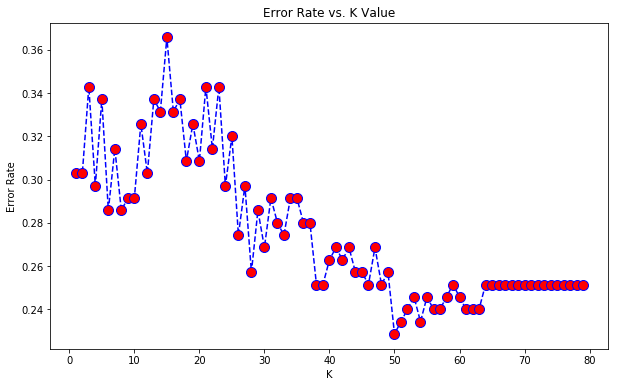

In [127]:
plt.figure(figsize=(10,6))
plt.plot(range(1,80),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10);
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [128]:
knn =KNeighborsClassifier(n_neighbors=23)

In [129]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=23, p=2,
           weights='uniform')

In [130]:
pred = knn.predict(X_test)

In [131]:
print(confusion_matrix(y_test,pred))

[[111  20]
 [ 40   4]]


In [132]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         1.0       0.74      0.85      0.79       131
         2.0       0.17      0.09      0.12        44

   micro avg       0.66      0.66      0.66       175
   macro avg       0.45      0.47      0.45       175
weighted avg       0.59      0.66      0.62       175

